# Assignment 3: Linear Models — Public Health
<span style="color: red; font-weight: bold;">Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.</span>

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

## Summary

This notebook provides a comprehensive demonstration of applying the <u>Linear Regression</u>, <u>Logistic Regression</u>, <u>Lasso Regression</u>, and <u>Ridge Regression</u> on a **synthetic** public health dataset. The dataset includes the following columns: 

1. **ID**: A unique identifier for each individual.
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (Male/Female).
4. **BMI**: Body Mass Index, a measure of body fat based on height and weight.
5. **Smoking Status**: The smoking status of the individual (Never, Former, Current).
6. **Exercise Frequency**: The frequency of exercise per week.
7. **Cholesterol Level**: The cholesterol level of the individual.
8. **Blood Pressure**: The blood pressure of the individual.
9. **Health Risk Score**: A calculated score representing the overall health risk of the individual.
10. **Health Risk Category**: The health risk category of the individual (Low, Medium, High).

### Goal:

The goal is to predict health risk scores (for regression) and health risk categories (for classification) based on features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, and blood pressure.

## Loading the Dataset

We will load the public health dataset that contains features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, blood pressure, <u>health risk score (for regression)</u>, and <u>health risk category (for classification)</u>.

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, classification_report, r2_score

# Load the dataset
data = pd.read_csv('public_health_dataset.csv')

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,BMI,Smoking Status,Exercise Frequency,Cholesterol Level,Blood Pressure,Health Risk Score,Health Risk Category
0,1,62,Female,22.812775,Former,4,119.690569,104.027015,74.966827,Medium
1,2,65,Female,18.902457,Former,0,151.031562,106.691143,78.305866,Medium
2,3,82,Female,31.286677,Former,0,167.483621,87.811173,95.605578,Medium
3,4,85,Male,23.427027,Former,2,124.839669,91.354148,80.921337,Medium
4,5,85,Female,25.755887,Former,6,192.860153,121.826556,95.150886,Medium


## Data Preprocessing  
Before building the models, we need to preprocess the data. Here's what we'll do:  

1. **Drop Unnecessary Columns**: Remove irrelevant columns to streamline the dataset.
2. **Encode Categorical Variables**: Transform categorical data (e.g., Gender) into numerical form.
3. **Split Data**: Separate features from target variables for classification and regression tasks.
4. **Divide into Training and Testing Sets**: Allocate 80% of data for training, 20% for testing.
5. **Normalize Features**: Scale features to a range of [0, 1] for consistent model performance.

In [19]:
# Drop the ID column as it is not useful for modeling
data = data.drop(columns=['ID'])

# Encode categorical variables (e.g., Gender, Smoking Status) into numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking Status'] = label_encoder.fit_transform(data['Smoking Status'])

# Separate features (X) and target variables (y_class for classification, y_reg for regression)
X = data.drop(columns=['Health Risk Category', 'Health Risk Score'])  # Features
y_class = data['Health Risk Category']  # Target for classification
y_reg = data['Health Risk Score']  # Target for regression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

# Normalize the features using MinMaxScaler to bring all values into the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **<span style="color:green">A. Linear Regression Model</span>**
We’ll use LinearRegression to predict the Health Risk Score.

1. **Model Training**: Initialize and train the linear regression model using scaled training data.
2. **Prediction**: Use the trained model to make predictions on the scaled test data.
3. **Performance Evaluation**: Assess the model's performance with metrics:
   - MSE (Mean Squared Error)
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
   - R² Score

In [12]:
# --- Linear Regression ---
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_reg)  # Train the model
y_pred_reg_linear = linear_reg.predict(X_test_scaled)  # Predict on test data

# Evaluate Linear Regression performance
mse_linear = mean_squared_error(y_test_reg, y_pred_reg_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test_reg, y_pred_reg_linear)
r2_linear = r2_score(y_test_reg, y_pred_reg_linear)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression MAE: {mae_linear}")
print(f"Linear Regression R² Score: {r2_linear}")

Linear Regression MSE: 2.1103606936472506e-28
Linear Regression RMSE: 1.4527080552014747e-14
Linear Regression MAE: 1.0587086762825493e-14
Linear Regression R² Score: 1.0


### Scatter Plot for Linear Regression

Plot the actual vs. predicted health risk scores from the linear regression model with an ideal reference line for comparison.

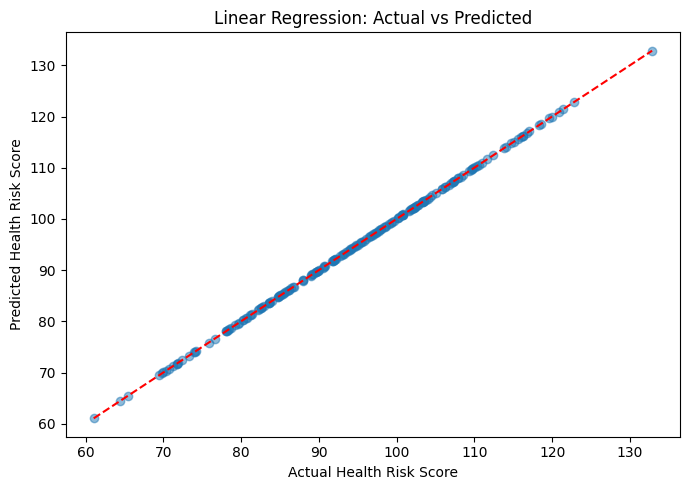

In [24]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_reg, y_pred_reg_linear, alpha=0.5)
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')  # Ideal line
plt.tight_layout()
plt.show()

## **<span style="color:green">B. Lasso Regression Model</span>**
We’ll use Lasso to predict the Health Risk Score.

1. **Model Training**: Initialize and train the linear regression model using scaled training data.
2. **Prediction**: Use the trained model to make predictions on the scaled test data.
3. **Performance Evaluation**: Assess the model's performance with metrics:
   - MSE (Mean Squared Error)
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
   - R² Score

In [14]:
# --- Lasso Regression (L1 Regularization) ---
lasso_reg = Lasso(alpha=0.1, max_iter=1000)  # Alpha controls regularization strength
lasso_reg.fit(X_train_scaled, y_train_reg)  # Train the model
y_pred_reg_lasso = lasso_reg.predict(X_test_scaled)  # Predict on test data

# Evaluate Lasso Regression performance
mse_lasso = mean_squared_error(y_test_reg, y_pred_reg_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_reg_lasso)
r2_lasso = r2_score(y_test_reg, y_pred_reg_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression R² Score: {r2_lasso}")

Lasso Regression MSE: 0.5136205841546846
Lasso Regression RMSE: 0.71667327573636
Lasso Regression MAE: 0.5723533168501036
Lasso Regression R² Score: 0.9970999076568363


### Scatter Plot for Lasso Regression

Plot the actual vs. predicted health risk scores from the Lasso regression model with an ideal reference line for comparison.

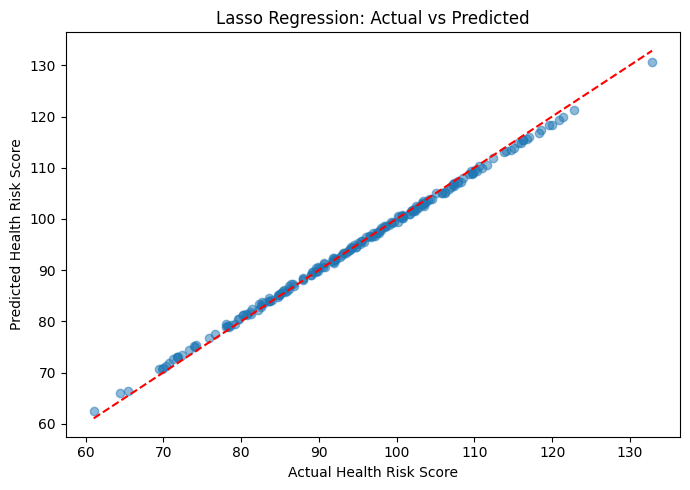

In [25]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_reg, y_pred_reg_lasso, alpha=0.5)
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score")
plt.title("Lasso Regression: Actual vs Predicted")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')  # Ideal line
plt.tight_layout()
plt.show()

# <span style="color:red">1. Lasso Regression Hyperparameters Tuning Assignment (5 points)</span>

## Objective:
Explore the impact of various hyperparameters on the performance of the Lasso Regression model.

## Instructions:
1. **alpha**: Experiment with different values of the regularization strength (e.g., `[0.01, 0.1, 1.0, 10.0]`).
2. **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters:
- Train the Lasso Regression model.
- Evaluate the model using the following metrics:
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Error (MAE)
  - R² Score
- Provide the outputs of evaluation metrics and the scatter plot for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**

## **<span style="color:green">C. Ridge Regression Model</span>**
We’ll use Lasso to predict the Health Risk Score.

1. **Model Training**: Initialize and train the linear regression model using scaled training data.
2. **Prediction**: Use the trained model to make predictions on the scaled test data.
3. **Performance Evaluation**: Assess the model's performance with metrics:
   - MSE (Mean Squared Error)
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
   - R² Score

In [15]:
# --- Ridge Regression (L2 Regularization) ---
ridge_reg = Ridge(alpha=1.0, max_iter=1000)  # Alpha controls regularization strength
ridge_reg.fit(X_train_scaled, y_train_reg)  # Train the model
y_pred_reg_ridge = ridge_reg.predict(X_test_scaled)  # Predict on test data

# Evaluate Ridge Regression performance
mse_ridge = mean_squared_error(y_test_reg, y_pred_reg_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_reg_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_reg_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Ridge Regression R² Score: {r2_ridge}")

Ridge Regression MSE: 0.03638687764884503
Ridge Regression RMSE: 0.19075344727905977
Ridge Regression MAE: 0.15503645351805204
Ridge Regression R² Score: 0.9997945461912615


### Scatter Plot for Ridge Regression

Plot the actual vs. predicted health risk scores from the Ridge regression model with an ideal reference line for comparison.

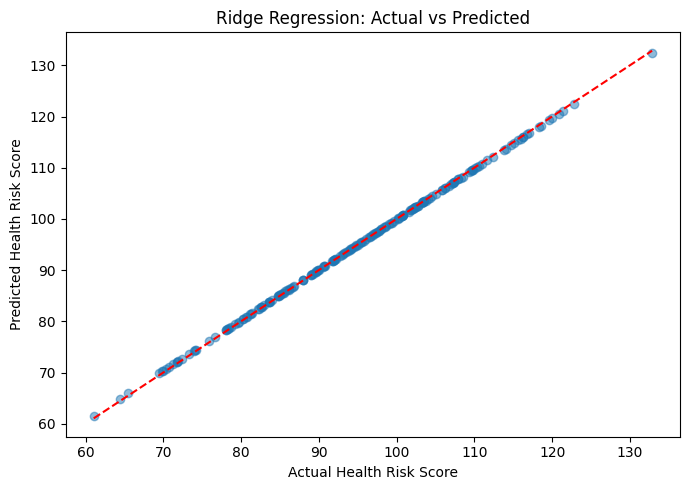

In [26]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_reg, y_pred_reg_ridge, alpha=0.5)
plt.xlabel("Actual Health Risk Score")
plt.ylabel("Predicted Health Risk Score")
plt.title("Ridge Regression: Actual vs Predicted")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 'r--')  # Ideal line
plt.tight_layout()
plt.show()

# <span style="color:red">2. Ridge Regression Hyperparameters Tuning Assignment (5 points)</span>

## Objective
Investigate the influence of different hyperparameters on the performance of the Ridge Regression model.

## Instructions
- **alpha**: Experiment with various values of the regularization strength (e.g., `[0.01, 0.1, 1.0, 10.0]`).
- **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters:
- Train the Ridge Regression model.
- Evaluate the model using the following metrics:
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Error (MAE)
  - R² Score
- Provide the outputs of evaluation metrics and the scatter plot for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**

## **<span style="color:green">D. Logistic Regression Model</span>**
We’ll use LogisticRegression to predict the Health Risk Category.

1. **Model Training**: Initialize and train the logistic regression model using scaled training data.
2. **Prediction**: Use the trained model to predict class labels on the scaled test data.
3. **Performance Evaluation**: Assess model accuracy and generate a detailed classification report.


In [20]:
# --- Logistic Regression ---
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train_class)  # Train the model
y_pred_class_logistic = logistic_reg.predict(X_test_scaled)  # Predict on test data

# Evaluate Logistic Regression performance
accuracy_logistic = accuracy_score(y_test_class, y_pred_class_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test_class, y_pred_class_logistic))

Logistic Regression Accuracy: 0.975
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       1.00      0.93      0.97        76
      Medium       0.96      1.00      0.98       124

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### Confusion Matrix for Logistic Regression

Create a heatmap to visualize the confusion matrix for the logistic regression model, comparing actual vs. predicted health risk categories.

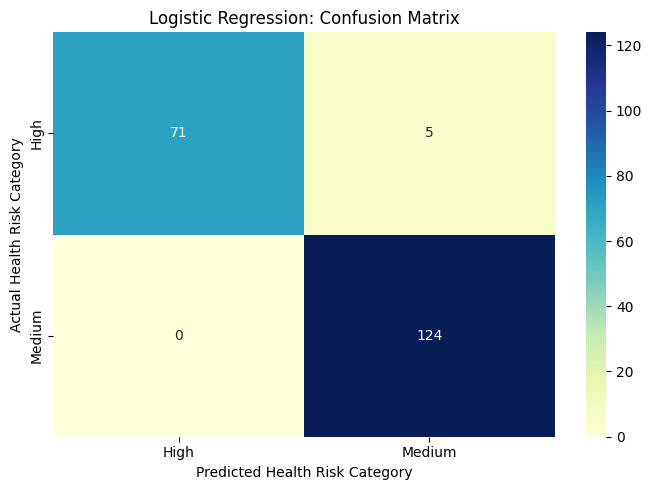

In [27]:
plt.figure(figsize=(7, 5))
sns.heatmap(pd.crosstab(y_test_class, y_pred_class_logistic), annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Health Risk Category")
plt.ylabel("Actual Health Risk Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.tight_layout()
plt.show()

# <span style="color:red">3. Lasso and Ridge Regularization for Logistic Regression Assignment (5 points)</span>

## Objective
Apply Lasso and Ridge regularization techniques to a Logistic Regression model and explore the impact of various hyperparameters on the model's performance.

## Instructions

### Lasso Regularization
- **alpha**: Experiment with different values of the regularization strength (e.g., `[0.01, 0.1, 1.0, 10.0]`).
- **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

### Ridge Regularization
- **alpha**: Experiment with different values of the regularization strength (e.g., `[0.01, 0.1, 1.0, 10.0]`).
- **max_iter**: Adjust the maximum number of iterations for the solver to converge (e.g., `[500, 1000, 2000]`).

For each combination of hyperparameters for both Lasso and Ridge regularization:
- Train the Logistic Regression model.
- Evaluate the model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score

- Provide the outputs of evaluation metrics and the confusion matrix for different combinations of hyperparameters in your report.

**At least one combination must be included for Lasso regularization and one combination for Ridge regularization in your final report for each regularization technique.**